#Curva ROC(Carácteristicas de Funcionamiento del Receptor) y AUC(Área Bajo la curva de la curva ROC):
Es una de las métricas de desempeño más importantes cuando se trata de tareas de clasificasión. Entonces, la curva ROC lo que nos indicará es que tan bien puede distinguir el módelo entre dos clases(lo cual lleva a concluir que la curva ROC es utilizada para clasificasión binaria y ya veremos la extensión a clasificasión multiclase y multisalida).

Para calcular la curva ROC se necesita de el vector de salida original($y$) y de un vector de probabilidades($scores$), que indique cual es la probabilidad de que cada instancia pertenezca a la clase positiva.
Luego, lo que se hace es establecer un umbral de probabilidad a partir del cual se tome la instancia como perteneciente a la clase positiva o a la clase negativa y a partir de esto encontrar la matrix de confusión, para a partir de esta hallar lo que es la sensibilidad o exhaustividad(recall) y la especificidad, como sigue:

$sensibilidad=\frac{TP}{TP+FN}$

$especificidad=\frac{TN}{TN+FP}$

Entonces, la sensibilidad es la proporción de pacientes que se identificaron correctamente en la clase positiva. Es de destacar que:

$TPR(True Positive Rate)=sensibilidad$


Mientras la especificidad es la proporción de pacientes que se identificaron correctamente en la clase negativa. Es de destacar que:

$FPR(False Positive Rate)=1-especificidad=\frac{FP}{FP+TN}$

También es de destacar que si la sensibilidad aumenta, la especificidad disminuye y viceversa, siendo por esta razón que la curva roc es TPRvsFPR, es decir, tasa de verdaderos positivos versus tasa de falsos positivos. 

En conclusión, para trasar la curva ROC lo que se hace es hallar TPR y FPR para varios valores de probabilidad umbral y luego se unen estos puntos, obteneiendo la curva ROC.

**AUC:** Es el área bajo la curva ROC y es la que me indica que tan bien o que tan mal distingue mi modelo entre las dos clases. 
el AUC ideal es 1; pues esto indicaría que mi modelo es un clasificador perfecto, es decir, distingue perfectamente las dos clases.

Si obtenemos un AUC de 0.7, esto indica que hay una probabilidad del 70%, de que mi modelo pueda distinguir entre clase positiva y clase negativa.

El pero AUC es de 0; pues esto indica de que el modelo nunca es capaz de distinguir entre clase positiva y clase negativa.

En conclusión, entre el AUC más tienda a 1, quiere decir, que mejor es mi modelo y entre el AUC más tienda a 0, queire decir qe peor es mi modelo.

**Ventajas de la curva ROC:**
● Es una representación fácilmente comprensible de su capacidad de discriminación en todo el rango de valores.

● No requieren un nivel de decisión particular porque comprende todo el rango posible de valores.

● Es independiente de la prevalencia.

**Desventajas de la Curva ROC**:
● No se muestran los puntos de corte, sólo se muestran su sensibilidad y especificidad asociadas.

● Tampoco se muestra el número de sujetos.

● **El disminuir el tamaño de la muestra la curva tiende a hacerse más escalonada y desigual.(quizás la desventaja que más se aprecia en las siguiente simulaciones)**

● Si no se poseen programas informáticos, el cálculo de los parámetros y la generación de la curva son difíciles. 

**Curva ROC para clasificasión multiclase**: Para clasificasión multiclase, lo que se hace es obtener una curva ROC por cada una de las clases, por ejemplo, para la clase A, se toma la clase A como clase positiva y el resto de las clases como clase negativa y así para las demás clases.

**Curva ROC para clasificasión multisalida**: Para clasificasión multisalida, lo que se hace es que para cada salida, se obtiene una curva ROC o un conjunto de curvas ROC, de acuerdo al número de clases de cada salida, tal como se específico anteriormente(si la salida es binaria o multiclase).




#Generalización de métricas de desempeño para tareas de clasificasión binaria, multiclase y multisalida:

#Clasificasión Binaria:
Las siguiente son las métricas de desempeño estudiadas para clasificasión binaria:

**Exactitud**:Es la relación entre el número de muestras clasificadas correctamente y el número de muestras total:

$Exactitud=\frac{M}{N}$

**Precisión**:Indica que proporción de las muestras predecidas como pertenecientes a la clase positiva, son verdaderamente pertenecientes a la clase positiva:

$Precision=\frac{TP}{TP+FP}$

**Exhaustividad**: Indica que proporción de las muestras positivas son correctamente clasificadas: 

$Ehaustividad=\frac{TP}{TP+FN}$

Es de destacar, que cuando la exhaustividad aumente, la precisión disminuye y viceversa( son inversamente proporcionales).

**F1 Score**: Métrica utilizada para medir la precisión y la exhaustividad en conjunto:

$F2_score=2*\frac{exhaustividad*precision}{exhaustividad+precision}$

**F1 Ponderado**: Es una extensión del f1 score, en la cual se le da ,mayor relevancia a la precisión o a la exhaustividad a través de un parámetro $\beta$, según la aplicasión:

$F1_ponderado=(1+\beta ^{2})\frac{exhaustividad*precision}{\beta ^{2}*precsiion+exhaustividad}$

#Clasificasión Multiclase:
Se utlizan exactamente las mismas métricas que en clasificasión binaria, solo que por cada clase se saca una métrica, por ejemplo, para sacar las métricas de la clase A, se toma la clase A como positiva y las otras clases como negativas y así para las demás clases. Luego se hace una ponderación de las respectivas métricas obtenidas en cada clase, hay 2 tipos de ponderaciones:

- Ponderación macro: Se leda el mismo peso a cada una de las métricas de cada clase.

- Ponderación micro: Se le da más peso a algunas métircas de su respectuva clase, según la cantidad de veces que aperezca cada clase.

#Clasificasión Multisalida: 
Se utilizan exactamente las mismas métricas que en clasificasión binaria y multiclase, solom que por cada salida obtendré una métricas, es decir, a cada salida se le aplica clasificasión multiclase o clasificasión binaria(según el número de clases de cada salida).


In [273]:
import numpy as np
import tensorflow.keras.metrics as metricas
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [274]:
class Metrics_Sklearn():
  """
  DESCRIPCIÓN: Clase para evaluar métricas de desempeño en regresión (mse y mae) y clasificación (exactitud,precisión,
  exhaustividad, f1_score y f1_ponderado), además, para el caso de clasificación, permite obtener la matrix de confusión y 
  la curva ROC  y el AUC.
  -------------------------------------------------------------------------------------------------------------------------
  -------------------------------------------------------------------------------------------------------------------------
  ATRIBUTOS:
  - y_orig(ndarray): Tensor con la salida original
  - y_pred(ndarray): Tensor con la predicción de la salida
  - tarea(string):Para indicar si se trata de una tarea de regresión o clasificasión("regresion" or "clasificasion")
  -------------------------------------------------------------------------------------------------------------------------
  -------------------------------------------------------------------------------------------------------------------------
  MÉTODOS:
  - MSE:Para calcular el mean squared error
  - MAE:Para calcular el mean absolute error
  - all_metrics: Para calcular todas las metricas de clasificasión incluidas en esta clase
  Parámetros:
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
             - beta(float): parámetro beta para el caso de la métirca f1 ponderado (por defecto beta=2)
  - matrix_confusion: para graficar la matrix de confusión en el caso de clasificasión
  Parámetros:
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
  - roc_auc_curve: para graficar la curva ROC y mostrar el AUC.
  Parámetros:
             - scores(ndarray): Tensor con las probabilidades de que cada muestra pertenezca a la clase positiva.
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
  """

  def __init__(self,y_orig,y_pred,tarea):
    self.y_orig=y_orig
    self.y_pred=y_pred
    self.tarea=tarea


  def MSE(self):
    if self.tarea=="regresion":
      mse=metrics.mean_squared_error(self.y_orig,self.y_pred)
    else:
      mse="Solo aplica para tareas de regresión"
    return mse

  def MAE(self):
    if self.tarea=="regresion":
      mae=metrics.mean_absolute_error(self.y_orig,self.y_pred)
    else:
      mae="Solo aplica para tareas de regresión"
    return mae
  
  def all_metrics(self,clasificasion_type,beta=2):
    if self.tarea=="clasificacion":
      if clasificasion_type=="binary":
        exactitud=metrics.accuracy_score(self.y_orig,self.y_pred)
        precision=metrics.precision_score(self.y_orig,self.y_pred)
        exhaustividad=metrics.recall_score(self.y_orig,self.y_pred)
        f1_score=metrics.f1_score(self.y_orig,self.y_pred)
        f1_ponderado=metrics.fbeta_score(self.y_orig,self.y_pred,beta=beta)
      elif clasificasion_type=="multiclase":
        exactitud=metrics.accuracy_score(self.y_orig,self.y_pred)
        precision=metrics.precision_score(self.y_orig,self.y_pred, average="macro")
        exhaustividad=metrics.recall_score(self.y_orig,self.y_pred,average="macro")
        f1_score=metrics.f1_score(self.y_orig,self.y_pred,average="macro")
        f1_ponderado=metrics.fbeta_score(self.y_orig,self.y_pred,average="macro",beta=beta)
      elif clasificasion_type=="multisalida":
        exactitud=metrics.accuracy_score(self.y_orig,self.y_pred)
        precision=metrics.precision_score(self.y_orig,self.y_pred, average=None)
        exhaustividad=metrics.recall_score(self.y_orig,self.y_pred,average=None)
        f1_score=metrics.f1_score(self.y_orig,self.y_pred,average=None)
        f1_ponderado=metrics.fbeta_score(self.y_orig,self.y_pred,average=None,beta=beta)
       

    else:
      exactitud="Aplica solo para tareas de clasificación"
      precision="Aplica solo para tareas de clasificación"
      exhaustividad="Aplica solo para tareas de clasificación"
      f1_score="Aplica solo para tareas de clasificación"
      f1_ponderado="Aplica solo para tareas de clasificación"

    return exactitud,precision,exhaustividad,f1_score,f1_ponderado 

  def matrix_confusion(self, clasificasion_type):
    if clasificasion_type=="multisalida":
      N=self.y_orig.shape[1]
      for i in range(N):
        orig=self.y_orig[...,i]
        pred=self.y_pred[...,i]
        clases=np.unique(orig)
        matrix_confusion=confusion_matrix(orig,pred)
        matrix_confusion=pd.DataFrame(matrix_confusion,index=clases,columns=clases)
        plot_mc=sns.heatmap(matrix_confusion,cmap="Pastel1",annot=True)
        plot_mc.set(xlabel="Original",ylabel="Predicción",title="Salida "+str(i))
        plt.show()
    else:
      clases=np.unique(self.y_orig)
      matrix=confusion_matrix(self.y_orig,self.y_pred)
      matrix=pd.DataFrame(matrix,index=clases,columns=clases)
      plot_mc=sns.heatmap(matrix,cmap="Pastel1",annot=True)
      plot_mc.set(xlabel="Original",ylabel="Predicción",title="Confusion Matrix")
      plt.show()

  def roc_auc_curve(self,scores,clasificasion_type):
    if clasificasion_type=="binary":
      fpr,tpr,threshold=roc_curve(self.y_orig,scores,pos_label=1)
      area=auc(fpr,tpr)
      plt.plot(fpr,tpr,label="AUC="+str(area))
      plt.xlabel("fpr")
      plt.ylabel("tpr")
      plt.title("Curve ROC")
      plt.legend()
    elif clasificasion_type=="multiclase":
      clases=np.unique(self.y_orig)
      N=clases.shape[0]
      for i in range(N):
        fpr,tpr,threshold=roc_curve(self.y_orig,scores,pos_label=clases[i])
        area=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="Clase "+str(clases[i])+"-AUC="+str(area))
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("Curve ROC")
        plt.legend()
    else:
      N_outs=self.y_orig.shape[1]
      for i in range(N_outs):
        plt.figure()
        orig=self.y_orig[...,i]
        pred=self.y_pred[...,i]
        fpr,tpr,threshold=roc_curve(orig,scores,pos_label=1)
        area=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="Salida "+str(i)+"-AUC="+str(area))
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("Curve ROC")
        plt.legend()

#Probando la clase Metrics_Sklearn con regresión:

In [275]:
y_orig_reg=np.array([4,6.7,9,0,1,1.5,1.2,0.7])
y_pred_reg=np.array([4,6,8.8,0,0.9,1.3,1.2,0.5])
metriks_s_r=Metrics_Sklearn(y_orig_reg,y_pred_reg,tarea="regresion")
print("MSE:",metriks_s_r.MSE(),"MAE:",metriks_s_r.MAE())

MSE: 0.0775 MAE: 0.17499999999999993


#Probando la clase Metrics_Sklearn con clasificación binaria:

In [276]:
y_orig_b=np.array([0,1,0,0,1,1,1,0])
y_pred_b=np.array([0,1,1,1,0,0,0,0])
metriks_s_b=Metrics_Sklearn(y_orig_b,y_pred_b,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_s_b.all_metrics("binary")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.375 precision: 0.3333333333333333 exhaustividad: 0.25 f1_score: 0.28571428571428575 f1_ponderado: 0.2631578947368421


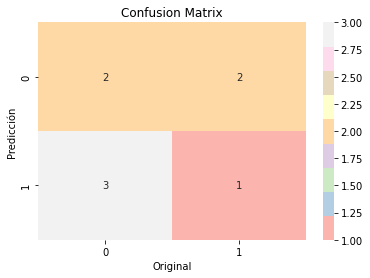

In [277]:
metriks_s_b.matrix_confusion("binary")

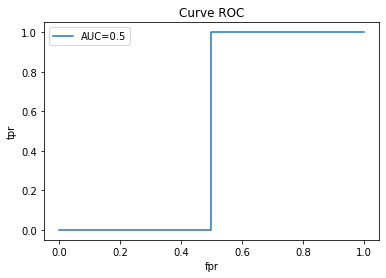

In [278]:
score = np.array([0.1, 0.4, 0.35, 0.8,0.7,0.5,0.67,0.85])
metriks_s_b.roc_auc_curve(score,"binary")

#Probando la clase Metrics_Sklearn con clasificación multiclase:

In [279]:
y_orig_mc=np.array([4,6,2,6,4,4])
y_pred_mc=np.array([4,6,2,6,6,2])
metriks_s_mc=Metrics_Sklearn(y_orig_mc,y_pred_mc,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_s_mc.all_metrics("multiclase")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.6666666666666666 precision: 0.7222222222222222 exhaustividad: 0.7777777777777777 f1_score: 0.6555555555555556 f1_ponderado: 0.7090132090132091


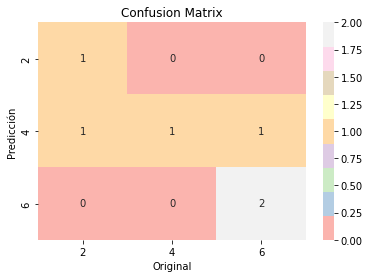

In [280]:
metriks_s_mc.matrix_confusion("multiclase")

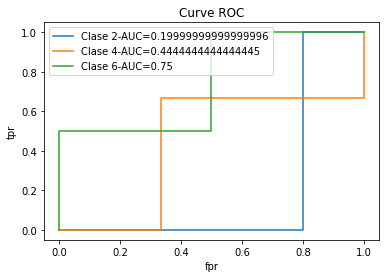

In [281]:
scores = np.array([0.1, 0.4, 0.35, 0.8,0.7,0.5])
metriks_s_mc.roc_auc_curve(scores,"multiclase")

#Probando la clase Metrics_Sklearn con clasificación multisalida:


In [282]:
y_orig_ms = np.array([[1,0, 1], [0, 1, 1], [0, 1, 0]])
y_pred_ms = np.array([[1, 0, 1], [1, 1, 0], [1, 1, 1]])
metriks_s_ms=Metrics_Sklearn(y_orig_ms,y_pred_ms,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_s_ms.all_metrics("multisalida")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.3333333333333333 precision: [0.33333333 1.         0.5       ] exhaustividad: [1.  1.  0.5] f1_score: [0.5 1.  0.5] f1_ponderado: [0.71428571 1.         0.5       ]


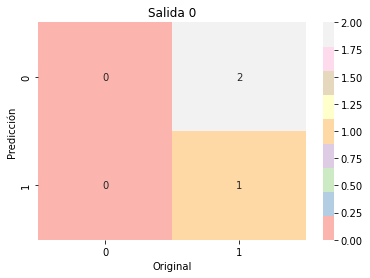

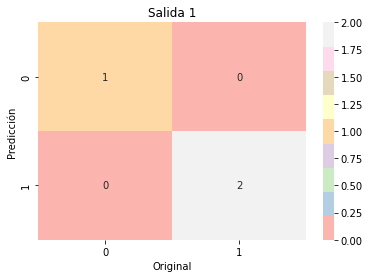

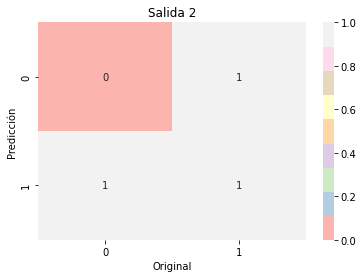

In [283]:
metriks_s_ms.matrix_confusion("multisalida")

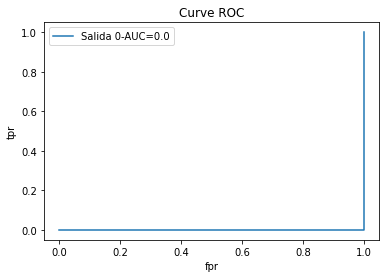

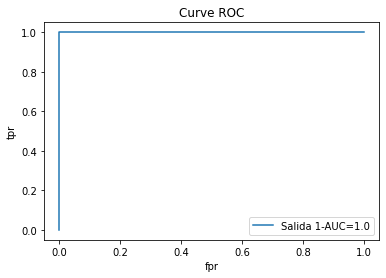

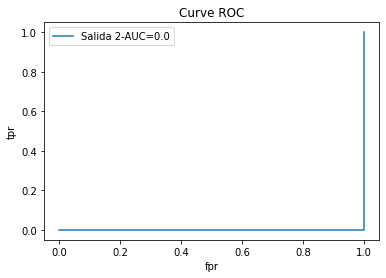

In [284]:
scores=(0.1,0.5,0.7)
metriks_s_ms.roc_auc_curve(scores,"multisalida")

In [285]:
class Metrics_Num_Mat():
  """
  DESCRIPCIÓN: Clase para evaluar métricas de desempeño en regresión (mse y mae) y clasificación (exactitud,precisión,
  exhaustividad, f1_score y f1_ponderado), además, para el caso de clasificación, permite obtener la matrix de confusión y 
  la curva ROC  y el AUC.
  -------------------------------------------------------------------------------------------------------------------------
  -------------------------------------------------------------------------------------------------------------------------
  ATRIBUTOS:
  - y_orig(ndarray): Tensor con la salida original
  - y_pred(ndarray): Tensor con la predicción de la salida
  - tarea(string):Para indicar si se trata de una tarea de regresión o clasificasión("regresion" or "clasificasion")
  -------------------------------------------------------------------------------------------------------------------------
  -------------------------------------------------------------------------------------------------------------------------
  MÉTODOS:
  - MSE:Para calcular el mean squared error
  - MAE:Para calcular el mean absolute error
  - all_metrics: Para calcular todas las metricas de clasificasión incluidas en esta clase
  Parámetros:
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
             - beta(float): parámetro beta para el caso de la métirca f1 ponderado (por defecto beta=2)
  - matrix_confusion: para graficar la matrix de confusión en el caso de clasificasión
  Parámetros:
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
  - roc_auc_curve: para graficar la curva ROC y mostrar el AUC.
  Parámetros:
             - scores(ndarray): Tensor con las probabilidades de que cada muestra pertenezca a la clase positiva.
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
  """

  def __init__(self,y_orig,y_pred,tarea):
    self.y_orig=y_orig
    self.y_pred=y_pred
    self.tarea=tarea


  def MSE(self):
    if self.tarea=="regresion":
      mse=0
      for i in range(self.y_orig.shape[0]):
        mse=mse+(self.y_orig[i]-self.y_pred[i])**2
      mse=mse/self.y_orig.shape[0]
    else:
      mse="Solo aplica para tareas de regresión"
    return mse

  def MAE(self):
    if self.tarea=="regresion":
      mae=0
      for i in range(self.y_orig.shape[0]):
        mae=mae+abs(self.y_orig[i]-self.y_pred[i])
      mae=mae/self.y_orig.shape[0]
    else:
      mae="Solo aplica para tareas de regresión"
    return mae
  
  def all_metrics(self,clasificasion_type,beta=2):
    if self.tarea=="clasificacion":
      if clasificasion_type=="binary":
        M=0
        N=self.y_orig.shape[0]
        for i in range(N):
          if self.y_orig[i]==self.y_pred[i]:
            M=M+1
        exactitud=M/N

        VP=0
        VN=0
        FP=0
        FN=0

        for i in range(self.y_orig.shape[0]):
          if (self.y_orig[i]==1 and self.y_pred[i]==1):
            VP=VP+1
          elif (self.y_orig[i]==0 and self.y_pred[i]==0):
            VN=VN+1
          elif (self.y_orig[i]==0 and self.y_pred[i]==1):
            FP=FP+1
          else:
            FN=FN+1

        precision=VP/(VP+FP)
        exhaustividad=VP/(VP+FN)
        f1_score=2*precision*exhaustividad/(precision+exhaustividad)

        B=beta
        f1_ponderado=(1+B**2)*(precision*exhaustividad)/((B**2)*precision+exhaustividad)
      elif clasificasion_type=="multiclase":
        M=0
        N=self.y_orig.shape[0]
        for i in range(N):
          if self.y_orig[i]==self.y_pred[i]:
            M=M+1
        exactitud=M/N

        clases=[self.y_orig[0]]
        len(clases)
        for i in range(1,N):
          count=0
          for j in range(len(clases)):
            if clases[j]!=self.y_orig[i]:
              count=count+1
          if count==len(clases):
            clases=np.append(clases,self.y_orig[i])


        VP=np.zeros((len(clases)))
        VN=np.zeros((len(clases)))
        FP=np.zeros((len(clases)))
        FN=np.zeros((len(clases)))
        for j in range(len(clases)):
          for i in range(N):
            if (self.y_orig[i]==clases[j] and self.y_pred[i]==clases[j]):
              VP[j]=VP[j]+1
            elif (self.y_orig[i]!=clases[j] and self.y_pred[i]!=clases[j]):
              VN[j]=VN[j]+1
            elif (self.y_orig[i]!=clases[j] and self.y_pred[i]==clases[j]):
              FP[j]=FP[j]+1
            else:
              FN[j]=FN[j]+1

        precision=np.zeros((len(clases)))
        exhaustividad=np.zeros((len(clases)))
        f1_score=np.zeros((len(clases)))
        f1_ponderado=np.zeros((len(clases)))

        f1_ponderado_total=0
        f1_score_total=0
        precision_total=0
        exhaustividad_total=0
        B=2
        for i in range(len(clases)):
          precision[i]=VP[i]/(VP[i]+FP[i])
          precision_total=precision_total+precision[i]

          exhaustividad[i]=VP[i]/(VP[i]+FN[i])
          exhaustividad_total=exhaustividad_total+exhaustividad[i]

          f1_score[i]=2*precision[i]*exhaustividad[i]/(precision[i]+exhaustividad[i])
          f1_score_total=f1_score_total+f1_score[i]

          f1_ponderado[i]=(1+B**2)*precision[i]*exhaustividad[i]/(B**2*precision[i]+exhaustividad[i])
          f1_ponderado_total=f1_ponderado_total+f1_ponderado[i]



        precision_prom=precision_total/len(clases)
        exhaustividad_prom=exhaustividad_total/len(clases)
        f1_score_prom=f1_score_total/len(clases)
        f1_ponderado_prom=f1_ponderado_total/len(clases)

        precision=precision_prom
        exhaustividad=exhaustividad_prom
        f1_score=f1_score_prom
        f1_ponderado=f1_ponderado_prom
  
      elif clasificasion_type=="multisalida":
        n_salidas=self.y_orig.shape[1]
        exactitud=np.zeros((n_salidas))
        precision=np.zeros((n_salidas))
        exhaustividad=np.zeros((n_salidas))
        f1_score=np.zeros((n_salidas))
        f1_ponderado=np.zeros((n_salidas))
        for m in range(n_salidas):
           M=0
           N=self.y_orig.shape[0]
           label_orig=self.y_orig[...,m]
           label_pred=self.y_pred[...,m]
           for i in range(N):
             if label_orig[i]==label_pred[i]:
               M=M+1
           exactitud[m]=M/N

           VP=0
           VN=0
           FP=0
           FN=0

           for i in range(label_orig[0]):
             if (label_orig[i]==1 and label_pred[i]==1):
               VP=VP+1
             elif (label_orig[i]==0 and label_pred==0):
               VN=VN+1
             elif (label_orig[i]==0 and label_pred[i]==1):
               FP=FP+1
             else:
               FN=FN+1

           precision[m]=VP/(VP+FP)
           exhaustividad[m]=VP/(VP+FN)
           f1_score[m]=2*precision[m]*exhaustividad[m]/(precision[m]+exhaustividad[m])

           B=beta
           f1_ponderado[m]=(1+B**2)*(precision[m]*exhaustividad[m])/((B**2)*precision[m]+exhaustividad[m])
       

    else:
      exactitud="Aplica solo para tareas de clasificación"
      precision="Aplica solo para tareas de clasificación"
      exhaustividad="Aplica solo para tareas de clasificación"
      f1_score="Aplica solo para tareas de clasificación"
      f1_ponderado="Aplica solo para tareas de clasificación"

    return exactitud,precision,exhaustividad,f1_score,f1_ponderado 

  def matrix_confusion(self, clasificasion_type):
    if clasificasion_type=="multisalida":
      N=self.y_orig.shape[1]
      for i in range(N):
        orig=self.y_orig[...,i]
        pred=self.y_pred[...,i]
        clases=np.unique(orig)
        matrix_confusion=confusion_matrix(orig,pred)
        matrix_confusion=pd.DataFrame(matrix_confusion,index=clases,columns=clases)
        plot_mc=sns.heatmap(matrix_confusion,cmap="Pastel1",annot=True)
        plot_mc.set(xlabel="Original",ylabel="Predicción",title="Salida "+str(i))
        plt.show()
    else:
      clases=np.unique(self.y_orig)
      matrix=confusion_matrix(self.y_orig,self.y_pred)
      matrix=pd.DataFrame(matrix,index=clases,columns=clases)
      plot_mc=sns.heatmap(matrix,cmap="Pastel1",annot=True)
      plot_mc.set(xlabel="Original",ylabel="Predicción",title="Confusion Matrix")
      plt.show()
  def roc_auc_curve(self,scores,clasificasion_type):
    if clasificasion_type=="binary":
      fpr,tpr,threshold=roc_curve(self.y_orig,scores,pos_label=1)
      area=auc(fpr,tpr)
      plt.plot(fpr,tpr,label="AUC="+str(area))
      plt.xlabel("fpr")
      plt.ylabel("tpr")
      plt.title("Curve ROC")
      plt.legend()
    elif clasificasion_type=="multiclase":
      clases=np.unique(self.y_orig)
      N=clases.shape[0]
      for i in range(N):
        fpr,tpr,threshold=roc_curve(self.y_orig,scores,pos_label=clases[i])
        area=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="Clase "+str(clases[i])+"-AUC="+str(area))
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("Curve ROC")
        plt.legend()
    else:
      N_outs=self.y_orig.shape[1]
      for i in range(N_outs):
        plt.figure()
        orig=self.y_orig[...,i]
        pred=self.y_pred[...,i]
        fpr,tpr,threshold=roc_curve(orig,scores,pos_label=1)
        area=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="Salida "+str(i)+"-AUC="+str(area))
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("Curve ROC")
        plt.legend()

#Probando la clase Metrics_Num_Mat con regresión:

In [286]:
metriks_nm_r=Metrics_Num_Mat(y_orig_reg,y_pred_reg,tarea="regresion")
print("MSE:",metriks_nm_r.MSE(),"MAE:",metriks_nm_r.MAE())

MSE: 0.07750000000000001 MAE: 0.1749999999999999


#Probando la clase Metrics_Num_Mat con clasificación binaria:

In [287]:
metriks_nm_b=Metrics_Num_Mat(y_orig_b,y_pred_b,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_nm_b.all_metrics("binary")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.375 precision: 0.3333333333333333 exhaustividad: 0.25 f1_score: 0.28571428571428575 f1_ponderado: 0.2631578947368421


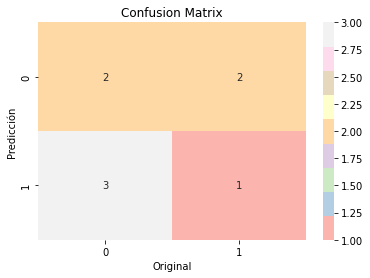

In [288]:
metriks_nm_b.matrix_confusion("binary")

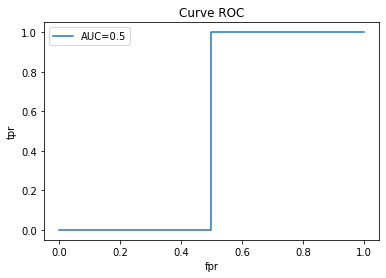

In [289]:
score = np.array([0.1, 0.4, 0.35, 0.8,0.7,0.5,0.67,0.85])
metriks_nm_b.roc_auc_curve(score,"binary")

#Probando la clase Metrics_Num_Mat con clasificación multiclase:

In [290]:
metriks_nm_mc=Metrics_Num_Mat(y_orig_mc,y_pred_mc,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_nm_mc.all_metrics("multiclase")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.6666666666666666 precision: 0.7222222222222222 exhaustividad: 0.7777777777777777 f1_score: 0.6555555555555556 f1_ponderado: 0.7090132090132091


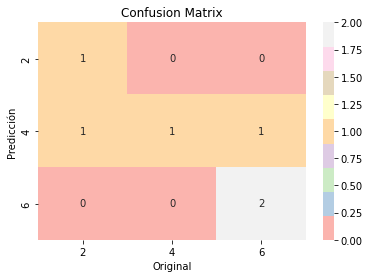

In [291]:
metriks_nm_mc.matrix_confusion("multiclase")

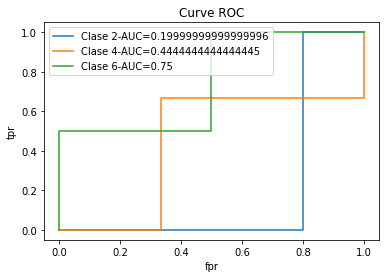

In [292]:
scores = np.array([0.1, 0.4, 0.35, 0.8,0.7,0.5])
metriks_nm_mc.roc_auc_curve(scores,"multiclase")

#Probando la clase Metrics_Num_Mat con clasificación multisalida:

In [293]:
metriks_nm_ms=Metrics_Num_Mat(y_orig_ms,y_pred_ms,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_s_ms.all_metrics("multisalida")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.3333333333333333 precision: [0.33333333 1.         0.5       ] exhaustividad: [1.  1.  0.5] f1_score: [0.5 1.  0.5] f1_ponderado: [0.71428571 1.         0.5       ]


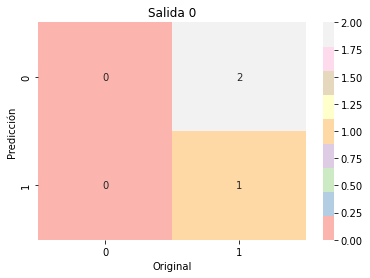

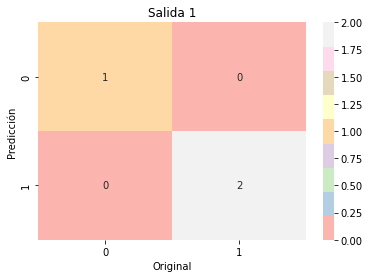

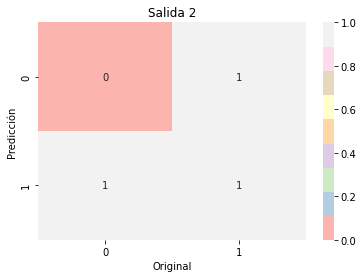

In [294]:
metriks_nm_ms.matrix_confusion("multisalida")

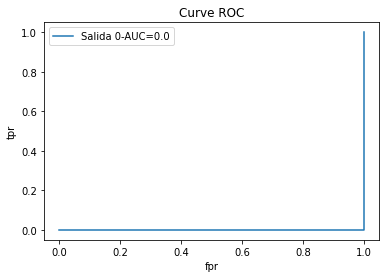

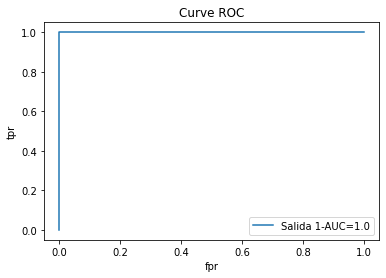

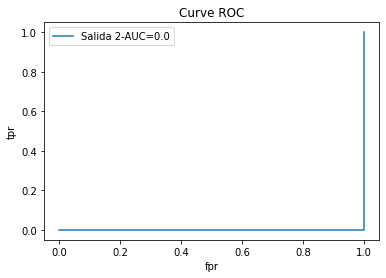

In [295]:
scores=(0.1,0.5,0.7)
metriks_nm_ms.roc_auc_curve(scores,"multisalida")

In [296]:
class Metrics_Keras():
  """
  DESCRIPCIÓN: Clase para evaluar métricas de desempeño en regresión (mse y mae) y clasificación (exactitud,precisión,
  exhaustividad, f1_score y f1_ponderado), además, para el caso de clasificación, permite obtener la matrix de confusión y 
  la curva ROC  y el AUC.
  -------------------------------------------------------------------------------------------------------------------------
  -------------------------------------------------------------------------------------------------------------------------
  ATRIBUTOS:
  - y_orig(ndarray): Tensor con la salida original
  - y_pred(ndarray): Tensor con la predicción de la salida
  - tarea(string):Para indicar si se trata de una tarea de regresión o clasificasión("regresion" or "clasificasion")
  -------------------------------------------------------------------------------------------------------------------------
  -------------------------------------------------------------------------------------------------------------------------
  MÉTODOS:
  - MSE:Para calcular el mean squared error
  - MAE:Para calcular el mean absolute error
  - all_metrics: Para calcular todas las metricas de clasificasión incluidas en esta clase
  Parámetros:
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
             - beta(float): parámetro beta para el caso de la métirca f1 ponderado (por defecto beta=2)
  - matrix_confusion: para graficar la matrix de confusión en el caso de clasificasión
  Parámetros:
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
  - roc_auc_curve: para graficar la curva ROC y mostrar el AUC.
  Parámetros:
             - scores(ndarray): Tensor con las probabilidades de que cada muestra pertenezca a la clase positiva.
             - clasificasion_type(string): para indicar si se trata de una clasificasión binaria, multiclase o multisalida ("binary","multiclase" or "multisalida")
  """

  def __init__(self,y_orig,y_pred,tarea):
    self.y_orig=y_orig
    self.y_pred=y_pred
    self.tarea=tarea


  def MSE(self):
    if self.tarea=="regresion":
      mse=metricas.MeanSquaredError()
      mse.update_state(self.y_orig,self.y_pred)
      mse=mse.result().numpy()
    else:
      mse="Solo aplica para tareas de regresión"
    return mse

  def MAE(self):
    if self.tarea=="regresion":
      mae=metricas.MeanAbsoluteError()
      mae.update_state(self.y_orig,self.y_pred)
      mae=mae.result().numpy()
    else:
      mae="Solo aplica para tareas de regresión"
    return mae
  
  def all_metrics(self,clasificasion_type,beta=2):
    if self.tarea=="clasificacion":
      if clasificasion_type=="binary":
        TP=metricas.TruePositives()
        TP.update_state(self.y_orig,self.y_pred)
        TP=TP.result().numpy()

        TN=metricas.TrueNegatives()
        TN.update_state(self.y_orig,self.y_pred)
        TN=TN.result().numpy()

        N=self.y_orig.shape[0]

        exactitud=(TP+TN)/N

        precision=metricas.Precision()
        precision.update_state(self.y_orig,self.y_pred)
        precision=precision.result().numpy()

        exhaustividad=metricas.Recall()
        exhaustividad.update_state(self.y_orig,self.y_pred)
        exhaustividad=exhaustividad.result().numpy()

        f1_score=2*exhaustividad*precision/(precision+exhaustividad)
        f1_ponderado=(1+beta**2)*exhaustividad*precision/(beta**2*precision+exhaustividad)
      elif clasificasion_type=="multiclase":
        M=0
        N=self.y_orig.shape[0]
        for i in range(N):
          if self.y_orig[i]==self.y_pred[i]:
            M=M+1
        exactitud=M/N

        clases=[self.y_orig[0]]
        len(clases)
        for i in range(1,N):
          count=0
          for j in range(len(clases)):
            if clases[j]!=self.y_orig[i]:
              count=count+1
          if count==len(clases):
            clases=np.append(clases,self.y_orig[i])


        VP=np.zeros((len(clases)))
        VN=np.zeros((len(clases)))
        FP=np.zeros((len(clases)))
        FN=np.zeros((len(clases)))
        for j in range(len(clases)):
          for i in range(N):
            if (self.y_orig[i]==clases[j] and self.y_pred[i]==clases[j]):
              VP[j]=VP[j]+1
            elif (self.y_orig[i]!=clases[j] and self.y_pred[i]!=clases[j]):
              VN[j]=VN[j]+1
            elif (self.y_orig[i]!=clases[j] and self.y_pred[i]==clases[j]):
              FP[j]=FP[j]+1
            else:
              FN[j]=FN[j]+1

        precision=np.zeros((len(clases)))
        exhaustividad=np.zeros((len(clases)))
        f1_score=np.zeros((len(clases)))
        f1_ponderado=np.zeros((len(clases)))

        f1_ponderado_total=0
        f1_score_total=0
        precision_total=0
        exhaustividad_total=0
        B=2
        for i in range(len(clases)):
          precision[i]=VP[i]/(VP[i]+FP[i])
          precision_total=precision_total+precision[i]

          exhaustividad[i]=VP[i]/(VP[i]+FN[i])
          exhaustividad_total=exhaustividad_total+exhaustividad[i]

          f1_score[i]=2*precision[i]*exhaustividad[i]/(precision[i]+exhaustividad[i])
          f1_score_total=f1_score_total+f1_score[i]

          f1_ponderado[i]=(1+B**2)*precision[i]*exhaustividad[i]/(B**2*precision[i]+exhaustividad[i])
          f1_ponderado_total=f1_ponderado_total+f1_ponderado[i]



        precision_prom=precision_total/len(clases)
        exhaustividad_prom=exhaustividad_total/len(clases)
        f1_score_prom=f1_score_total/len(clases)
        f1_ponderado_prom=f1_ponderado_total/len(clases)

        precision=precision_prom
        exhaustividad=exhaustividad_prom
        f1_score=f1_score_prom
        f1_ponderado=f1_ponderado_prom
  
      elif clasificasion_type=="multisalida":
        n_salidas=self.y_orig.shape[1]
        exactitud=np.zeros((n_salidas))
        precision=np.zeros((n_salidas))
        exhaustividad=np.zeros((n_salidas))
        f1_score=np.zeros((n_salidas))
        f1_ponderado=np.zeros((n_salidas))
        for m in range(n_salidas):
           M=0
           N=self.y_orig.shape[0]
           label_orig=self.y_orig[...,m]
           label_pred=self.y_pred[...,m]
           for i in range(N):
             if label_orig[i]==label_pred[i]:
               M=M+1
           exactitud[m]=M/N

           VP=0
           VN=0
           FP=0
           FN=0

           for i in range(label_orig[0]):
             if (label_orig[i]==1 and label_pred[i]==1):
               VP=VP+1
             elif (label_orig[i]==0 and label_pred==0):
               VN=VN+1
             elif (label_orig[i]==0 and label_pred[i]==1):
               FP=FP+1
             else:
               FN=FN+1

           precision[m]=VP/(VP+FP)
           exhaustividad[m]=VP/(VP+FN)
           f1_score[m]=2*precision[m]*exhaustividad[m]/(precision[m]+exhaustividad[m])

           B=beta
           f1_ponderado[m]=(1+B**2)*(precision[m]*exhaustividad[m])/((B**2)*precision[m]+exhaustividad[m])
       

    else:
      exactitud="Aplica solo para tareas de clasificación"
      precision="Aplica solo para tareas de clasificación"
      exhaustividad="Aplica solo para tareas de clasificación"
      f1_score="Aplica solo para tareas de clasificación"
      f1_ponderado="Aplica solo para tareas de clasificación"

    return exactitud,precision,exhaustividad,f1_score,f1_ponderado

  def matrix_confusion(self, clasificasion_type):
    if clasificasion_type=="multisalida":
      N=self.y_orig.shape[1]
      for i in range(N):
        orig=self.y_orig[...,i]
        pred=self.y_pred[...,i]
        clases=np.unique(orig)
        matrix_confusion=confusion_matrix(orig,pred)
        matrix_confusion=pd.DataFrame(matrix_confusion,index=clases,columns=clases)
        plot_mc=sns.heatmap(matrix_confusion,cmap="Pastel1",annot=True)
        plot_mc.set(xlabel="Original",ylabel="Predicción",title="Salida "+str(i))
        plt.show()
    else:
      clases=np.unique(self.y_orig)
      matrix=confusion_matrix(self.y_orig,self.y_pred)
      matrix=pd.DataFrame(matrix,index=clases,columns=clases)
      plot_mc=sns.heatmap(matrix,cmap="Pastel1",annot=True)
      plot_mc.set(xlabel="Original",ylabel="Predicción",title="Confusion Matrix")
      plt.show()
  
  def roc_auc_curve(self,scores,clasificasion_type):
    if clasificasion_type=="binary":
      fpr,tpr,threshold=roc_curve(self.y_orig,scores,pos_label=1)
      area=auc(fpr,tpr)
      plt.plot(fpr,tpr,label="AUC="+str(area))
      plt.xlabel("fpr")
      plt.ylabel("tpr")
      plt.title("Curve ROC")
      plt.legend()
    elif clasificasion_type=="multiclase":
      clases=np.unique(self.y_orig)
      N=clases.shape[0]
      for i in range(N):
        fpr,tpr,threshold=roc_curve(self.y_orig,scores,pos_label=clases[i])
        area=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="Clase "+str(clases[i])+"-AUC="+str(area))
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("Curve ROC")
        plt.legend()
    else:
      N_outs=self.y_orig.shape[1]
      for i in range(N_outs):
        plt.figure()
        orig=self.y_orig[...,i]
        pred=self.y_pred[...,i]
        fpr,tpr,threshold=roc_curve(orig,scores,pos_label=1)
        area=auc(fpr,tpr)
        plt.plot(fpr,tpr,label="Salida "+str(i)+"-AUC="+str(area))
        plt.xlabel("fpr")
        plt.ylabel("tpr")
        plt.title("Curve ROC")
        plt.legend()




#Probando la clase Metrics_Keras con regresión:

In [297]:
metriks_k_r=Metrics_Keras(y_orig_reg,y_pred_reg,tarea="regresion")
print("MSE:",metriks_k_r.MSE(),"MAE:",metriks_k_r.MAE())

MSE: 0.07749996 MAE: 0.17499997


#Probando la clase Metrics_Keras con clasificación binaria:

In [298]:
metriks_k_b=Metrics_Keras(y_orig_b,y_pred_b,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_k_b.all_metrics("binary")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.375 precision: 0.33333334 exhaustividad: 0.25 f1_score: 0.2857142747664946 f1_ponderado: 0.2631578959751657


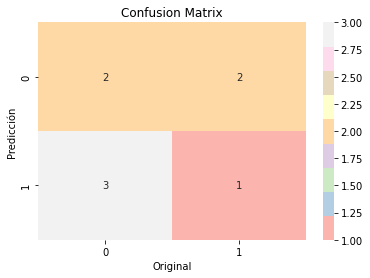

In [299]:
metriks_k_b.matrix_confusion("binary")

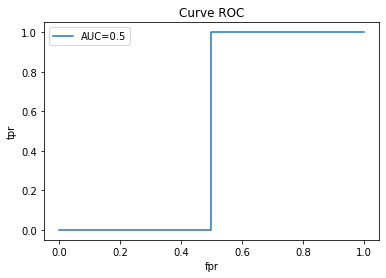

In [300]:
score = np.array([0.1, 0.4, 0.35, 0.8,0.7,0.5,0.67,0.85])
metriks_k_b.roc_auc_curve(score,"binary")

#Probando la clase Metrics_Keras con clasificación multiclase:

In [301]:
metriks_k_mc=Metrics_Keras(y_orig_mc,y_pred_mc,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_k_mc.all_metrics("multiclase")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.6666666666666666 precision: 0.7222222222222222 exhaustividad: 0.7777777777777777 f1_score: 0.6555555555555556 f1_ponderado: 0.7090132090132091


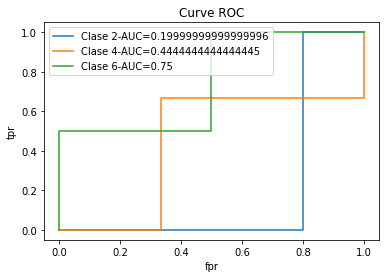

In [302]:
scores = np.array([0.1, 0.4, 0.35, 0.8,0.7,0.5])
metriks_k_mc.roc_auc_curve(scores,"multiclase")

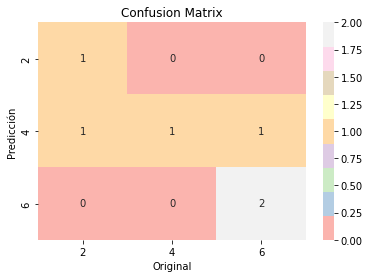

In [303]:
metriks_k_mc.matrix_confusion("multiclase")

In [304]:
metriks_k_ms=Metrics_Keras(y_orig_ms,y_pred_ms,tarea="clasificacion")
exactitud,precision,exhaustividad,f1_score,f1_ponderado =metriks_s_ms.all_metrics("multisalida")
print("Exactitud:",exactitud,"precision:",precision,"exhaustividad:",exhaustividad,"f1_score:",f1_score,"f1_ponderado:",f1_ponderado)

Exactitud: 0.3333333333333333 precision: [0.33333333 1.         0.5       ] exhaustividad: [1.  1.  0.5] f1_score: [0.5 1.  0.5] f1_ponderado: [0.71428571 1.         0.5       ]


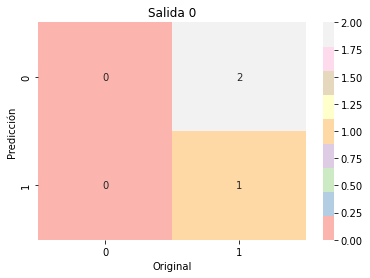

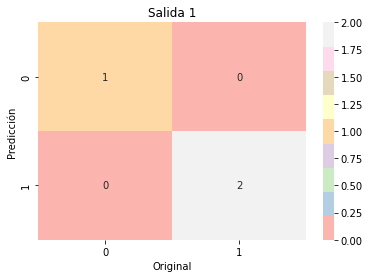

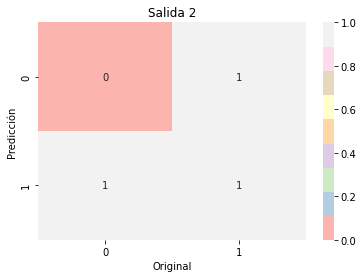

In [305]:
metriks_k_ms.matrix_confusion("multisalida")

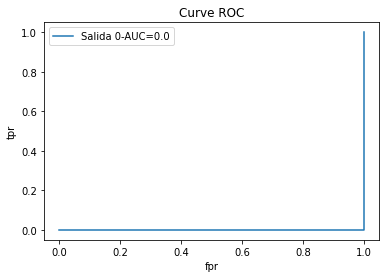

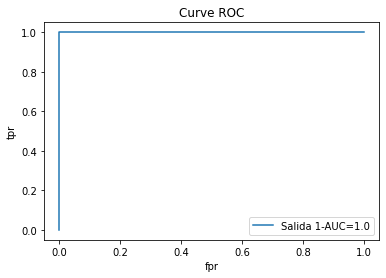

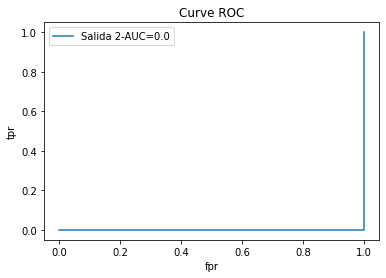

In [306]:
scores=(0.1,0.5,0.7)
metriks_k_ms.roc_auc_curve(scores,"multisalida")